#**Machine Learning Study Case - Sentiment Analysis**

Sentiment analysis can be crucial for determining the next steps in an event or project as it can reflect the public's opinion on the event or program. One example where sentiment analysis is used is during elections. Candidates need feedback from the public to see if their campaign is working or not, as well as to know their strengths and weaknesses in the eyes of the public. This can be used as a gauge and reference for their next strategy.

In this task, we will analyze the sentiment of a dataset of tweets about the 2017 DKI Jakarta Local Leader Election (Pilkada) using machine learning and compare the performance of two algorithms. In the prediction, we can see whether a certain tweet is positive or negative.

The completion steps include:

1. Data Acquisition
2. Text Pre-processing
   1. Case Folding
   2. Filtering
   3. Stopword
   4. Stemming
3. Feature Engineering
   1. Feature Extraction - TF IDF
   2. Feature Selection - Chi-Square
4. Modelling (Machine Learning)
   1. Naive Bayes
   2. Support Vector Machine (SVM)
5. Model Evaluation
   1. Naive Bayes
   2. Support Vector Machine (SVM)

**By Giselle Halim**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

%matplotlib inline

In [ ]:
# Install library Sastrawi
!pip -q install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 3.2 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# 01 Data Acquisition

Mengambil data dari GitHub dan melihat isi dari dataset.
Dataset yang digunakan adalah data 900 tweet Pilkada DKI 2017.

In [ ]:
dataset_sentimen = pd.read_csv('https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_pilkada_DKI_2017.csv')
dataset_sentimen.head()

,Id,Sentiment,Pasangan Calon,Text Tweet
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...


In [ ]:
dataset_sentimen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              900 non-null    int64 
 1   Sentiment       900 non-null    object
 2   Pasangan Calon  900 non-null    object
 3   Text Tweet      900 non-null    object
dtypes: int64(1), object(3)
memory usage: 28.2+ KB


In [ ]:
def polaritas(teks):
  if teks =='positive':
    return 1
  elif teks =='negative':
    return -1

In [ ]:
dataset_sentimen['label'] = dataset_sentimen['Sentiment'].apply(polaritas)

In [ ]:
dataset_sentimen.tail()

,Id,Sentiment,Pasangan Calon,Text Tweet,label
895,896,positive,Anies-Sandi,"Kali saja bpk @aniesbaswedan @sandiuno lihat, ...",1
896,897,positive,Anies-Sandi,Kita harus dapat merangkul semua orang tanpa b...,1
897,898,positive,Anies-Sandi,Ini jagoanku dibidang digital <Smiling Face Wi...,1
898,899,positive,Anies-Sandi,#PesanBijak #OkeOce #GubernurGu3 ...,1
899,900,positive,Anies-Sandi,Sandiaga: Bangun Rumah DP 0% Lebih Simpel Diba...,1


In [ ]:
dataset_sentimen['label']

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
895    1
896    1
897    1
898    1
899    1
Name: label, Length: 900, dtype: int64

Label:

1 = Positive

-1 = Negative

In [ ]:
print('Total Tweet:', dataset_sentimen.shape[0], 'data\n')
print('terdiri dari (label):')
print('-- [0] Negative\t:', dataset_sentimen[dataset_sentimen.label == -1].shape[0], 'data')
print('-- [1] Positive\t:', dataset_sentimen[dataset_sentimen.label== 1].shape[0], 'data')

Total Tweet: 900 data

terdiri dari (label):
-- [0] Negative	: 450 data
-- [1] Positive	: 450 data


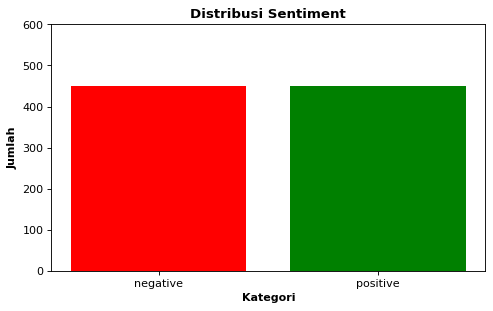

In [ ]:
height = dataset_sentimen['Sentiment'].value_counts()
labels = ('negative','positive')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Sentiment Distribution', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['red', 'green'])
plt.xticks(y_pos, labels)
plt.show()

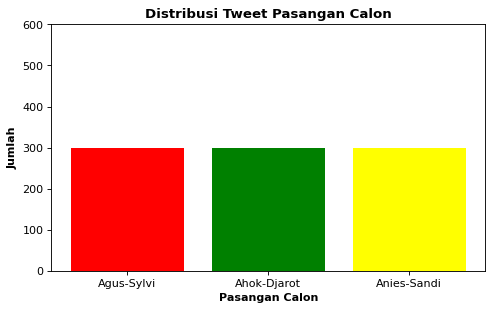

In [ ]:
height = dataset_sentimen['Pasangan Calon'].value_counts()
labels = ('Agus-Sylvi','Ahok-Djarot','Anies-Sandi')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,600)
plt.title('Tweet Distribution of Each Candidate', fontweight='bold')
plt.xlabel('Pasangan Calon', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['red', 'green','yellow'])
plt.xticks(y_pos, labels)
plt.show()

# 02 Text Preprocessing

## Case Folding

In [ ]:
import re

#Casefolding
def casefolding(text):
  text = text.lower()                               #Change all text to lowercase
  text = re.sub(r'https?://\S+|www\.\S+', '', text) #Delete URLs
  text = re.sub(r'[-+]?[0-9]+', '', text)           #Delete numbers
  text = re.sub(r'[^\w\s]','', text)                #Delete punctuations
  text = text.strip()
  return text

In [ ]:
raw_sample = dataset_sentimen['Text Tweet'].iloc[5]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('Case folding\t: ', case_folding)

Raw data	:  aneh deh lebay masa ini di sangkut pautkan sama kandidat Calgub, anda lebay seperti yg anda dukung #agussilvy
Case folding	:  aneh deh lebay masa ini di sangkut pautkan sama kandidat calgub anda lebay seperti yg anda dukung agussilvy


## Filtering (Stopword Removal)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

#Delete stopwords based on the given corpus
!wget https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/stopword_tweet_pilkada_DKI_2017.csv

stopwords_ind = pd.read_csv('stopword_tweet_pilkada_DKI_2017.csv')

--2023-04-09 15:27:43--  https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/stopword_tweet_pilkada_DKI_2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7345 (7.2K) [text/plain]
Saving to: ‘stopword_tweet_pilkada_DKI_2017.csv’

stopword_tweet_pilk 100%[===================>]   7.17K  --.-KB/s    in 0s      

2023-04-09 15:27:43 (61.0 MB/s) - ‘stopword_tweet_pilkada_DKI_2017.csv’ saved [7345/7345]



In [ ]:
len(stopwords_ind)

783

In [ ]:
#Indonesian stopwords list in NLTK
stopwords_ind[:20]

,ada
0,adalah
1,adanya
2,adapun
3,agak
4,agaknya
5,agar
6,aja
7,akan
8,akankah
9,akhir


In [ ]:
#Removing stopwords

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [ ]:
raw_sample = dataset_sentimen['Text Tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)

Raw data		:  aneh deh lebay masa ini di sangkut pautkan sama kandidat Calgub, anda lebay seperti yg anda dukung #agussilvy
Case folding		:  aneh deh lebay masa ini di sangkut pautkan sama kandidat calgub anda lebay seperti yg anda dukung agussilvy
Stopword removal	:  aneh deh lebay masa ini di sangkut pautkan sama kandidat calgub anda lebay seperti yg anda dukung agussilvy


## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#Stemming
def stemming(text):
  text = stemmer.stem(text)
  return text

In [ ]:
raw_sample = dataset_sentimen['Text Tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  aneh deh lebay masa ini di sangkut pautkan sama kandidat Calgub, anda lebay seperti yg anda dukung #agussilvy
Case folding		:  aneh deh lebay masa ini di sangkut pautkan sama kandidat calgub anda lebay seperti yg anda dukung agussilvy
Stopword removal	:  aneh deh lebay masa ini di sangkut pautkan sama kandidat calgub anda lebay seperti yg anda dukung agussilvy
Stemming		:  aneh deh lebay masa ini di sangkut paut sama kandidat calgub anda lebay seperti yg anda dukung agussilvy


## Text Preprocessing Pipeline

In [ ]:
#Text preprocessing pipeline
def text_preprocessing_process(text):
  text = casefolding(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [ ]:
#Computation time
%%time
dataset_sentimen['text_tweet_bersih'] = dataset_sentimen['Text Tweet'].apply(text_preprocessing_process)

CPU times: user 3min 29s, sys: 712 ms, total: 3min 30s
Wall time: 3min 45s


In [ ]:
dataset_sentimen

,Id,Sentiment,Pasangan Calon,Text Tweet,label,text_tweet_bersih
0,1,negative,Agus-Sylvi,Banyak akun kloning seolah2 pendukung #agussil...,-1,banyak akun kloning olah dukung agussilvy mula...
1,2,negative,Agus-Sylvi,#agussilvy bicara apa kasihan yaa...lap itu ai...,-1,agussilvy bicara apa kasihan yaalap itu air ma...
2,3,negative,Agus-Sylvi,Kalau aku sih gak nunggu hasil akhir QC tp lag...,-1,kalau aku sih gak nunggu hasil akhir qc tp lag...
3,4,negative,Agus-Sylvi,Kasian oh kasian dengan peluru 1milyar untuk t...,-1,kasi oh kasi dengan peluru milyar untuk tiap r...
4,5,negative,Agus-Sylvi,Maaf ya pendukung #AgusSilvy..hayo dukung #Ani...,-1,maaf ya dukung agussilvyhayo dukung aniessandi...
...,...,...,...,...,...,...
895,896,positive,Anies-Sandi,"Kali saja bpk @aniesbaswedan @sandiuno lihat, ...",1,kali saja bpk aniesbaswedan sandiuno lihat lag...
896,897,positive,Anies-Sandi,Kita harus dapat merangkul semua orang tanpa b...,1,kita harus dapat rangkul semua orang tanpa bat...
897,898,positive,Anies-Sandi,Ini jagoanku dibidang digital <Smiling Face Wi...,1,ini jago bidang digital smiling face with sung...
898,899,positive,Anies-Sandi,#PesanBijak #OkeOce #GubernurGu3 ...,1,pesanbijak okeoce gubernurgu


In [ ]:
#Save the clean data
#data.to_csv('clean_data.csv')

# 03 Feature Engineering

In [ ]:
X = dataset_sentimen['text_tweet_bersih']
y = dataset_sentimen['label']

In [ ]:
X

0      banyak akun kloning olah dukung agussilvy mula...
1      agussilvy bicara apa kasihan yaalap itu air ma...
2      kalau aku sih gak nunggu hasil akhir qc tp lag...
3      kasi oh kasi dengan peluru milyar untuk tiap r...
4      maaf ya dukung agussilvyhayo dukung aniessandi...
                             ...                        
895    kali saja bpk aniesbaswedan sandiuno lihat lag...
896    kita harus dapat rangkul semua orang tanpa bat...
897    ini jago bidang digital smiling face with sung...
898                         pesanbijak okeoce gubernurgu
899    sandiaga bangun rumah dp lebih simpel banding ...
Name: text_tweet_bersih, Length: 900, dtype: object

In [ ]:
y

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
895    1
896    1
897    1
898    1
899    1
Name: label, Length: 900, dtype: int64

## Feature Extraction (TF-IDF & N-Gram)
Convert texts to vectors using TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

TfidfVectorizer()

In [ ]:
#How many features?
print(len(tf_idf.get_feature_names_out()))

2898


In [ ]:
#Features in the corpus
print(tf_idf.get_feature_names_out())

['aa' 'aagym' 'aamiin' ... 'zarazettirazz' 'zippermouth' 'zona']


In [ ]:
#Matrix for number of tokens
X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Data ready to use for modeling

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aa,aagym,aamiin,abaaah,abal,abang,abdi,abis,absurd,abunawas,...,youtubebxrzdua,yra,yudhoyono,yuk,yusuf,zalim,zarazettirazr,zarazettirazz,zippermouth,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

## Feature Selection (Chi Square)

In [ ]:
#Converting tabular data values to arrays for feature selection process
X = np.array(data_tf_idf)
y = np.array(y)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Ten features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k=1000)
X_kbest_features = chi2_features.fit_transform(X, y)

#Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])

Original feature number: 2898
Reduced feature number: 1000


In [ ]:
#Better feature as the score get higher
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,0.084200
1,0.636188
2,0.121262
3,0.293690
4,0.043570
...,...
2893,0.654428
2894,0.325576
2895,0.492322
2896,1.814894


In [ ]:
#Feture + the score
feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,0.084200,aa
1,0.636188,aagym
2,0.121262,aamiin
3,0.293690,abaaah
4,0.043570,abal
...,...,...
2893,0.654428,zalim
2894,0.325576,zarazettirazr
2895,0.492322,zarazettirazz
2896,1.814894,zippermouth


In [ ]:
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
898,1.299747e+01,hand
2806,8.034064e+00,victory
1838,7.589422e+00,ok
1068,4.759580e+00,jakarta
2296,3.877970e+00,satu
...,...,...
2165,1.793359e-07,rawan
2181,1.288742e-07,rekonsiliasi
1764,9.921069e-08,ngawur
1433,2.992420e-08,lari


In [ ]:
#Masking the selected feature
#False = not selected, True = selected features
mask = chi2_features.get_support()
mask

array([False,  True, False, ...,  True,  True, False])

In [ ]:
#Showing selected features based on mask/highest score calculated with Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['aagym',
 'abang',
 'abis',
 'adalah',
 'adil',
 'adjrot',
 'agama',
 'agar',
 'agus',
 'agusharimurtiyudhoyono',
 'agussilvy',
 'agussilvyhayo',
 'agussylvi',
 'agusyudhoyono',
 'ahhhh',
 'ahok',
 'ahokbali',
 'ahokbtp',
 'ahokdjarotdirosi',
 'ahoker',
 'ahokfree',
 'ahokhebat',
 'ahokjarot',
 'ahoklovers',
 'ahokmandikembang',
 'ahokmartir',
 'ahokpenistaagama',
 'ahokpresidenrike',
 'ahokrekormuri',
 'ahokselaludihati',
 'ahokshow',
 'ahoktakbersalah',
 'ahyall',
 'ahycenter',
 'ahydemiindonesia',
 'ahyfansclub',
 'ahyforall',
 'ahyhargamati',
 'ahymaininsara',
 'ahysilvy',
 'ahythenextleaderahyadalahkita',
 'ahywearethenextleader',
 'ajar',
 'aji',
 'akal',
 'akan',
 'akhir',
 'akibat',
 'aksi',
 'akting',
 'akun',
 'akunakun',
 'alat',
 'alhamdullilah',
 'alien',
 'almaidah',
 'amanah',
 'amanatnasional',
 'amat',
 'anak',
 'ancam',
 'aneh',
 'anggap',
 'aniesgubernurbaru',
 'aniessandiaga',
 'aniessandiwiner',
 'aniessandy',
 'aniestidakkonsisten',
 'anisa',
 'anissandi',
 'anta

In [ ]:
#TF-IDF Vocalbulary
# tf_idf.vocabulary_

kbest_feature = {} #Empty dictionary

for (k,v) in tf_idf.vocabulary_.items():
  if k in selected_feature:                 #Checking if the feature is the selected feature
    kbest_feature[k] = v                    #If yes, insert the feature into the empty dictionary

In [ ]:
kbest_feature

{'akun': 110,
 'agussilvy': 28,
 'serang': 2383,
 'dan': 577,
 'apa': 193,
 'kasihan': 1218,
 'yaalap': 2871,
 'itu': 1055,
 'wkwkwkwk': 2863,
 'kalau': 1175,
 'gak': 781,
 'akhir': 102,
 'lagi': 1405,
 'cuit': 552,
 'pak': 1884,
 'kayak': 1235,
 'pasca': 1929,
 'nyungsep': 1828,
 'kasi': 1216,
 'oh': 1835,
 'milyar': 1649,
 'untuk': 2783,
 'rw': 2241,
 'tidak': 2657,
 'pilkada': 2021,
 'quickcount': 2135,
 'maaf': 1504,
 'ya': 2867,
 'agussilvyhayo': 29,
 'putar': 2125,
 'ronavioleta': 2221,
 'netizentofa': 1755,
 'aneh': 152,
 'lebay': 1442,
 'masa': 1564,
 'seperti': 2379,
 'kami': 1184,
 'rasa': 2161,
 'terimakasih': 2626,
 'suara': 2485,
 'terima': 2625,
 'kasih': 1217,
 'kalian': 1178,
 'atas': 236,
 'agusyudhoyono': 31,
 'lah': 1410,
 'kalah': 1172,
 'dammnn': 575,
 'politik': 2063,
 'cantik': 488,
 'sby': 2308,
 'ngorbanin': 1783,
 'tau': 2577,
 'ga': 772,
 'boleh': 422,
 'ngakak': 1758,
 'survey': 2514,
 'panggang': 1900,
 'api': 200,
 'karna': 1211,
 'belebihan': 345,
 'baik'

In [ ]:
#Selected feature

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,aagym,abang,abis,adalah,adil,adjrot,agama,agar,agus,agusharimurtiyudhoyono,...,yakin,ye,yep,youtube,yra,yudhoyono,yuk,zalim,zarazettirazz,zippermouth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

# 04 Modeling (Machine Learning)

In [ ]:
from sklearn.model_selection import train_test_split
from joblib import dump

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=40)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
#Training the model
algorithm = BernoulliNB()
model = algorithm.fit(X_train, y_train)

#Saving the model
#dump(model, filename='model_1.joblib')

In [ ]:
model_pred = model.predict(X_test)

#Predicted label
model_pred

array([ 1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,
        1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,
        1, -1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,
        1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
        1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,
        1, -1,  1,  1, -1,  1, -1, -1,  1,  1])

In [ ]:
#Actual label
y_test

array([ 1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,
        1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,
        1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
       -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,
        1, -1,  1,  1, -1, -1, -1, -1,  1,  1])

## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
#Training the model
algorithm2 = SVC(gamma=0.01, C=100, kernel='rbf')
model2 = algorithm2.fit(X_train, y_train)

In [ ]:
model_pred2 = model2.predict(X_test)

#Predicted label
model_pred2

array([-1, -1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,
        1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
        1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,
        1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,
       -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1, -1, -1,  1,  1])

In [ ]:
#actual label
y_test

array([ 1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1,
        1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1,
        1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
       -1,  1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,
        1, -1,  1,  1, -1, -1, -1, -1,  1,  1])

# 05 Model Evaluation

Looking at the performance and results of the two models by calculating true and false predictions, classification reports, and cross validation using Stratified Shuffle Split.

## Naive Bayes

In [ ]:
#Predicted vs Actual Label
prediksi_benar = (model_pred == y_test).sum()
prediksi_salah = (model_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 158
Jumlah prediksi salah	: 22
Akurasi pengujian	: 87.77777777777777 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[78 17]
 [ 5 80]]


In [ ]:
from sklearn.metrics import classification_report
print('Classification report:\n', classification_report(y_test, model_pred))

Classification report:
               precision    recall  f1-score   support

          -1       0.94      0.82      0.88        95
           1       0.82      0.94      0.88        85

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180



In [ ]:
# Cross Validation
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

cv_accuracy = (cross_val_score(model, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.88333333 0.83333333 0.81111111 0.88888889 0.87777778 0.82777778
 0.86111111 0.83888889 0.86111111 0.87222222] 

Rata-rata akurasi pada cross validation: 0.8555555555555555


## Support Vector Machine (SVM)

In [ ]:
prediksi_benar = (model_pred2 == y_test).sum()
prediksi_salah = (model_pred2 != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy = prediksi_benar / (prediksi_benar + prediksi_salah)*100
print('Akurasi pengujian\t:', accuracy, '%')

Jumlah prediksi benar	: 157
Jumlah prediksi salah	: 23
Akurasi pengujian	: 87.22222222222223 %


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model_pred2)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[84 11]
 [12 73]]


In [ ]:
from sklearn.metrics import classification_report
print('Classification report:\n', classification_report(y_test, model_pred2))

Classification report:
               precision    recall  f1-score   support

          -1       0.88      0.88      0.88        95
           1       0.87      0.86      0.86        85

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [ ]:
# Cross Validation

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

cv_accuracy = (cross_val_score(model2, X_kbest_features, y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.83888889 0.81111111 0.80555556 0.88333333 0.86111111 0.77777778
 0.84444444 0.85555556 0.87222222 0.86111111] 

Rata-rata akurasi pada cross validation: 0.8411111111111109
